In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [2]:
# read the CSV file
df = pd.read_csv(r'C:\Users\Saemi\OneDrive\Education\WGU\D209 Data Mining I\PA1\medical_clean.csv')
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# visually inspect the dataframe. Explorate the data and spot the problems
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
df['Marital'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [8]:
df['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [9]:
df['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [10]:
df['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [11]:
df['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [12]:
df['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [13]:
df['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [14]:
df['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [15]:
df['Anxiety'].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [16]:
df['Asthma'].value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [17]:
df['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [18]:
df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [19]:
df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [20]:
df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [21]:
df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [22]:
df['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [23]:
search_cols = ['Marital', 'Gender', 'Initial_admin', 'HighBlood', 'Complication_risk', 'Arthritis', 'Overweight', 'Diabetes', 
               'Income', 'BackPain', 'Anxiety', 'Asthma', 'Services', 'Age', 'VitD_levels', 'Initial_days', 'TotalCharge']
initial_model = df[search_cols]
initial_model.head()

,Marital,Gender,Initial_admin,HighBlood,Complication_risk,Arthritis,Overweight,Diabetes,Income,BackPain,Anxiety,Asthma,Services,Age,VitD_levels,Initial_days,TotalCharge
0,Divorced,Male,Emergency Admission,Yes,Medium,Yes,No,Yes,86575.93,Yes,Yes,Yes,Blood Work,53,19.141466,10.585770,3726.702860
1,Married,Female,Emergency Admission,Yes,High,No,Yes,No,46805.99,No,No,No,Intravenous,51,18.940352,15.129562,4193.190458
2,Widowed,Female,Elective Admission,Yes,Medium,No,Yes,Yes,14370.14,No,No,No,Blood Work,53,18.057507,4.772177,2434.234222
3,Married,Male,Elective Admission,No,Medium,Yes,No,No,39741.49,No,No,Yes,Blood Work,78,16.576858,1.714879,2127.830423
4,Widowed,Female,Elective Admission,No,Low,No,No,No,1209.56,No,No,No,CT Scan,22,17.439069,1.254807,2113.073274


In [24]:
one_hot = pd.get_dummies(initial_model, drop_first=True)
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Income                               10000 non-null  float64
 1   Age                                  10000 non-null  int64  
 2   VitD_levels                          10000 non-null  float64
 3   Initial_days                         10000 non-null  float64
 4   TotalCharge                          10000 non-null  float64
 5   Marital_Married                      10000 non-null  bool   
 6   Marital_Never Married                10000 non-null  bool   
 7   Marital_Separated                    10000 non-null  bool   
 8   Marital_Widowed                      10000 non-null  bool   
 9   Gender_Male                          10000 non-null  bool   
 10  Gender_Nonbinary                     10000 non-null  bool   
 11  Initial_admin_Emergency Admis

In [25]:
# update the invalid column names
one_hot.rename(columns={'Marital_Never Married':'Marital_Never_Married',
                        'Initial_admin_Emergency Admission':'Initial_admin_Emergency_Admission',
                        'Initial_admin_Observation Admission':'Initial_admin_Observation_Admission',
                        'Services_CT Scan':'Services_CT_Scan'}, inplace=True)

In [26]:
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Income                               10000 non-null  float64
 1   Age                                  10000 non-null  int64  
 2   VitD_levels                          10000 non-null  float64
 3   Initial_days                         10000 non-null  float64
 4   TotalCharge                          10000 non-null  float64
 5   Marital_Married                      10000 non-null  bool   
 6   Marital_Never_Married                10000 non-null  bool   
 7   Marital_Separated                    10000 non-null  bool   
 8   Marital_Widowed                      10000 non-null  bool   
 9   Gender_Male                          10000 non-null  bool   
 10  Gender_Nonbinary                     10000 non-null  bool   
 11  Initial_admin_Emergency_Admis

In [27]:
# update the data type from categorical(bool) to numerical(into64)
bool_cols = list(one_hot.select_dtypes(include='bool'))
bool_cols

['Marital_Married',
 'Marital_Never_Married',
 'Marital_Separated',
 'Marital_Widowed',
 'Gender_Male',
 'Gender_Nonbinary',
 'Initial_admin_Emergency_Admission',
 'Initial_admin_Observation_Admission',
 'HighBlood_Yes',
 'Complication_risk_Low',
 'Complication_risk_Medium',
 'Arthritis_Yes',
 'Overweight_Yes',
 'Diabetes_Yes',
 'BackPain_Yes',
 'Anxiety_Yes',
 'Asthma_Yes',
 'Services_CT_Scan',
 'Services_Intravenous',
 'Services_MRI']

In [28]:
for col in bool_cols:
    one_hot[col] = one_hot[col].astype(dtype='int64')
    
one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Income                               10000 non-null  float64
 1   Age                                  10000 non-null  int64  
 2   VitD_levels                          10000 non-null  float64
 3   Initial_days                         10000 non-null  float64
 4   TotalCharge                          10000 non-null  float64
 5   Marital_Married                      10000 non-null  int64  
 6   Marital_Never_Married                10000 non-null  int64  
 7   Marital_Separated                    10000 non-null  int64  
 8   Marital_Widowed                      10000 non-null  int64  
 9   Gender_Male                          10000 non-null  int64  
 10  Gender_Nonbinary                     10000 non-null  int64  
 11  Initial_admin_Emergency_Admis

In [29]:
one_hot.head()

,Income,Age,VitD_levels,Initial_days,TotalCharge,Marital_Married,Marital_Never_Married,Marital_Separated,Marital_Widowed,Gender_Male,...,Complication_risk_Medium,Arthritis_Yes,Overweight_Yes,Diabetes_Yes,BackPain_Yes,Anxiety_Yes,Asthma_Yes,Services_CT_Scan,Services_Intravenous,Services_MRI
0,86575.93,53,19.141466,10.585770,3726.702860,0,0,0,0,1,...,1,1,0,1,1,1,1,0,0,0
1,46805.99,51,18.940352,15.129562,4193.190458,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,14370.14,53,18.057507,4.772177,2434.234222,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
3,39741.49,78,16.576858,1.714879,2127.830423,1,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
4,1209.56,22,17.439069,1.254807,2113.073274,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# normalize the numeric values
one_hot_scaled = pd.DataFrame(MinMaxScaler().fit_transform(one_hot), columns=one_hot.columns)
one_hot_scaled.head()

,Income,Age,VitD_levels,Initial_days,TotalCharge,Marital_Married,Marital_Never_Married,Marital_Separated,Marital_Widowed,Gender_Male,...,Complication_risk_Medium,Arthritis_Yes,Overweight_Yes,Diabetes_Yes,BackPain_Yes,Anxiety_Yes,Asthma_Yes,Services_CT_Scan,Services_Intravenous,Services_MRI
0,0.417305,0.492958,0.562756,0.135022,0.246933,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.225268,0.464789,0.550632,0.199037,0.311343,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.068645,0.492958,0.497410,0.053117,0.068475,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.191156,0.845070,0.408150,0.010044,0.026168,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.005097,0.056338,0.460128,0.003562,0.024130,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
one_hot_scaled.to_csv('final.csv')

In [32]:
# define X
init_feats = one_hot_scaled.columns.values.tolist()
init_feats.remove("TotalCharge")

X = one_hot_scaled[init_feats]
y = one_hot_scaled["TotalCharge"]

# split the data to training & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# save each X/y and test/train set to csv
X_train.to_csv('X_Train.csv')
X_test.to_csv('X_Test.csv')
y_train.to_csv('y_Train.csv')
y_test.to_csv('y_Test.csv')

In [34]:
# identify optimal value for parameters using hyperparameter tuning
params_rfr = {"n_estimators": np.arange(500, 2000, 250),
              "max_depth": np.arange(5, 40, 5),
              "min_samples_leaf": np.arange(0.01, 0.2, 0.04)
            }

# initiate RandomForestRegressor
rfr = RandomForestRegressor(random_state=15, bootstrap=True, max_features='sqrt')

In [35]:
# initiate 5-fold CV grid (Naik)
grid_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=params_rfr, scoring='neg_mean_squared_error', cv=5)

#fit 'grid_rfr' to training data
grid_rfr.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   random_state=15),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35]),
                                        'min_samples_leaf': array([0.01, 0.05, 0.09, 0.13, 0.17]),
                                        'n_estimators': array([ 500,  750, 1000, 1250, 1500, 1750])},
                   scoring='neg_mean_squared_error')

In [36]:
# extract best hyperparameters from grid_dt
print('Best Hyperparameters: ', grid_rfr.best_params_)
print('Best Training Score: ', grid_rfr.best_estimator_.score(X_train, y_train))
print('Best Test Score: ', grid_rfr.best_estimator_.score(X_test, y_test))

Best Hyperparameters:  {'n_estimators': 500, 'min_samples_leaf': 0.01, 'max_depth': 15}
Best Training Score:  0.8524231394524944
Best Test Score:  0.8478543077594669


In [37]:
# fit the DecisionTree with the best parameters
best_rfr = RandomForestRegressor(max_depth=15, min_samples_leaf=0.01, n_estimators=500)
best_rfr.fit(X_train, y_train)
y_train_pred = best_rfr.predict(X_train)
y_test_pred = best_rfr.predict(X_test)

In [38]:
# calculate MSE & RMSE for training set
print("Training MSE: ", mean_squared_error(y_train, y_train_pred))
print("Training RMSE: ", mean_squared_error(y_train, y_train_pred)**(1/2))
print("Training R-squared: ", r2_score(y_train, y_train_pred))

Training MSE:  0.0006839090360933408
Training RMSE:  0.0261516545574719
Training R-squared:  0.9924260294046223


In [39]:
# calculate MSE & RMSE for test set
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test RMSE: ", mean_squared_error(y_test, y_test_pred)**(1/2))
print("Test R-squared: ", r2_score(y_test, y_test_pred))

Test MSE:  0.0007370961573024453
Test RMSE:  0.02714951486311395
Test R-squared:  0.9919280050269824


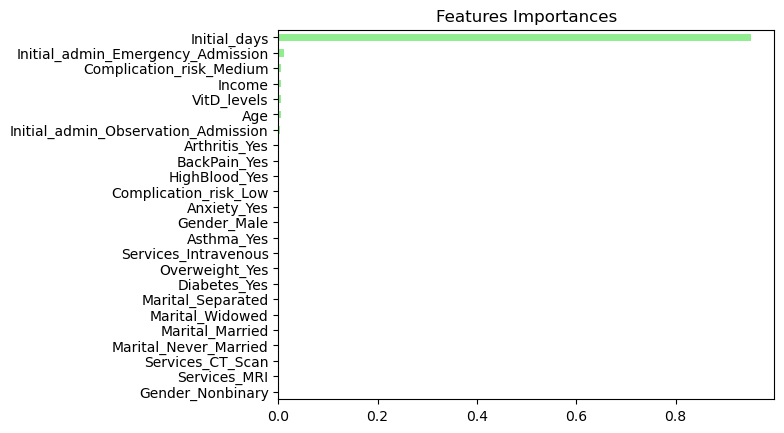

In [40]:
# create a pd.Series of features importances
importances = pd.Series(data=grid_rfr.best_estimator_.feature_importances_,
                        index = X_train.columns)
# sort importances
importances_sorted = importances.sort_values()

# draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()